## Importacion de librerias para realizar la segunda parte del proyecto.

In [1699]:
# 1. Librerias para el Analisis de los datos
import pandas as pd
import numpy as np

# 2. Librerias de estadisticas y graficas de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Metodos de preprocesamiento de los datos
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,LabelEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 4. Selección de Características y Reducción de Dimensionalidad
from sklearn.feature_selection import (
    SelectKBest, f_regression, chi2, mutual_info_classif, f_classif
)
from sklearn.decomposition import PCA

# 5. Creacion de modelos y demas algoritmos
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    GradientBoostingRegressor, IsolationForest, RandomForestRegressor, RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC


# 6. Analisis de las metricas.
from sklearn.metrics import (
    mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error,
    classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# 7. Mejora, optimizacion y validacion de modelos
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV,
    cross_val_predict, StratifiedKFold
)


## 1.Carga del dataset y analisis y descripcion de las partes mas importantes del mismo.


In [1700]:
##Cargamos el dataset con Pandas.
df = pd.read_csv('madridEdit.csv')
df.head()

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng
0,99440018,https://www.idealista.com/en/inmueble/99440018/,Studio flat for rent in luis cabrera,Studio,650,1.0,False,Madrid en Propiedad,30,NaN,...,False,False,False,"luis cabrera, Subdistrict Prosperidad, Distric...",Chamartín,Prosperidad,28002.0,7 November,40.444750,-3.671574
1,99440827,https://www.idealista.com/en/inmueble/99440827/,Flat / apartment for rent in calle de Pastora ...,Flat,1750,NaN,False,PUBLICASA MADRID,148,NaN,...,False,True,False,"Calle de Pastora Imperio, Subdistrict Castilla...",Chamartín,Castilla,28036.0,7 November,40.481725,-3.674384
2,97689853,https://www.idealista.com/en/inmueble/97689853/,Flat / apartment for rent in calle de Gabriel ...,Flat,1490,NaN,False,roomless,65,55.0,...,False,False,False,"Calle de Gabriel Lobo, 20, Subdistrict El Viso...",Chamartín,El Viso,28002.0,5 November,40.443449,-3.679917
3,97689852,https://www.idealista.com/en/inmueble/97689852/,Flat / apartment for rent in calle de Gabriel ...,Flat,900,NaN,False,roomless,50,40.0,...,False,False,False,"Calle de Gabriel Lobo, 20, Subdistrict El Viso...",Chamartín,El Viso,28002.0,5 November,40.443449,-3.679917
4,99399876,https://www.idealista.com/en/inmueble/99399876/,Flat / apartment for rent in El Viso,Flat,950,NaN,False,Spotahome,28,24.0,...,False,False,False,", Subdistrict El Viso, District Chamartín, Mad...",Chamartín,El Viso,NaN,6 November,40.449021,-3.686681


In [1701]:
#Queremos visualizar algunas de las principales columnas para ver datos relevantes. 
df[['price', 'deposit', 'floor_built', 'floor_area', 'bedrooms', 'bathrooms']].head()

,price,deposit,floor_built,floor_area,bedrooms,bathrooms
0,650,1.0,30,NaN,0,1
1,1750,NaN,148,NaN,3,2
2,1490,NaN,65,55.0,3,1
3,900,NaN,50,40.0,1,1
4,950,NaN,28,24.0,1,1


In [1702]:
# Visualizamos algunos datos categoricos
df[['orientation', 'private_owner', 'lift', 'garage_included', 'furnished', 'terrace', 'balcony', 'swimming_pool']].head()

,orientation,private_owner,lift,garage_included,furnished,terrace,balcony,swimming_pool
0,NaN,False,True,False,True,False,True,False
1,east,False,True,True,True,True,False,True
2,south,False,True,False,True,False,False,False
3,south,False,True,False,True,False,False,False
4,NaN,False,True,False,True,False,False,False


In [1703]:
#Describimos algunas de las estadisticas de las columnas del dataset
df.describe(include='all')

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng
count,9.229000e+03,9229,9229,9229,9229.000000,5407.000000,9229,7622,9229.000000,3938.000000,...,9229,9229,9229,9229,9096,8458,6834.000000,9229,9229.000000,9229.000000
unique,NaN,9229,5826,10,NaN,NaN,2,1580,NaN,NaN,...,2,2,1,5576,120,165,NaN,236,NaN,NaN
top,NaN,https://www.idealista.com/en/inmueble/2139592/,Flat / apartment for rent in Castellana,Flat,NaN,NaN,False,Home Club,NaN,NaN,...,False,False,False,", Subdistrict Castellana, District Barrio de S...",Centro,Lavapiés-Embajadores,NaN,7 November,NaN,NaN
freq,NaN,1,53,7361,NaN,NaN,7622,405,NaN,NaN,...,7097,6882,9229,58,1307,303,NaN,1019,NaN,NaN
mean,9.133077e+07,NaN,NaN,NaN,1937.995883,1.470686,NaN,NaN,110.285405,94.357288,...,NaN,NaN,NaN,NaN,NaN,NaN,28076.947761,NaN,40.348891,-3.885809
std,2.016654e+07,NaN,NaN,NaN,1615.063308,0.622239,NaN,NaN,87.183901,72.822703,...,NaN,NaN,NaN,NaN,NaN,NaN,171.686236,NaN,2.187182,4.094826
min,3.902730e+05,NaN,NaN,NaN,400.000000,1.000000,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,28001.000000,NaN,-34.466315,-122.282185
25%,9.578928e+07,NaN,NaN,NaN,1000.000000,1.000000,NaN,NaN,60.000000,54.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,28009.000000,NaN,40.416723,-3.708353
50%,9.891848e+07,NaN,NaN,NaN,1400.000000,1.000000,NaN,NaN,85.000000,75.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,28023.000000,NaN,40.432876,-3.693365
75%,9.929904e+07,NaN,NaN,NaN,2300.000000,2.000000,NaN,NaN,127.000000,110.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,28043.000000,NaN,40.456408,-3.672290


In [1704]:
#Cuenta de filas y columnas del dataset.
df.shape

(9229, 34)

In [1705]:
#Informacion del tipo de cada columna 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   web_id             9229 non-null   int64  
 1   url                9229 non-null   object 
 2   title              9229 non-null   object 
 3   type               9229 non-null   object 
 4   price              9229 non-null   int64  
 5   deposit            5407 non-null   float64
 6   private_owner      9229 non-null   bool   
 7   professional_name  7622 non-null   object 
 8   floor_built        9229 non-null   int64  
 9   floor_area         3938 non-null   float64
 10  floor              8908 non-null   object 
 11  year_built         2893 non-null   float64
 12  orientation        4411 non-null   object 
 13  bedrooms           9229 non-null   int64  
 14  bathrooms          9229 non-null   int64  
 15  second_hand        9229 non-null   bool   
 16  lift               9229 

In [1706]:
#Sacamos la informacion de los 5 pisos mas caros. Aqui podriamos observar que ciertos distritos son los que mas cuesta. Y que tambien suelen tener un valor alto en la columna de metros construidos.
df.sort_values('price', ascending=False).head(5)

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng
5089,99077965,https://www.idealista.com/en/inmueble/99077965/,Flat / apartment for rent in plaza del Marqués...,Flat,25000,1.0,False,Gilmar Barrio de Salamanca,512,380.0,...,False,False,False,"Plaza del Marqués de Salamanca, Subdistrict Li...",Barrio de Salamanca,Lista,28006.0,6 October,40.429857,-3.679987
2456,96643839,https://www.idealista.com/en/inmueble/96643839/,Detached house for rent in paseo de los lagos,Detached,25000,NaN,False,Gilmar Pozuelo - Aravaca,871,800.0,...,True,True,False,"Paseo de los lagos, Urb. La Finca, Subdistrict...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,6 October,40.419229,-3.803783
5873,99292422,https://www.idealista.com/en/inmueble/99292422/,Penthouse for rent in calle de Almagro,Penthouse,20000,2.0,False,Olisson Club,715,NaN,...,True,False,False,"Calle de Almagro, Subdistrict Almagro, Distric...",Chamberí,Almagro,NaN,6 November,40.429985,-3.693229
604,40286753,https://www.idealista.com/en/inmueble/40286753/,"Detached house for rent in paseo de los Lagos, 1",Detached,19500,NaN,False,Realizza La Finca,800,NaN,...,True,True,False,"Paseo de los Lagos, 1, Subdistrict La Finca, D...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,3 November,40.414920,-3.802890
6150,97728477,https://www.idealista.com/en/inmueble/97728477/,Detached house for rent in La Finca,Detached,19500,NaN,False,Engel & Völkers Madrid,728,NaN,...,False,True,False,", Subdistrict La Finca, District Zona Prado de...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,21 October,40.418684,-3.796824


In [1707]:
#Buscamos los pisos que tengan mas de 400 de floor built y que su precio se mas caro que 15000.
df[(df['price'] >= 15000) & (df['floor_built'] >= 400)]

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng
604,40286753,https://www.idealista.com/en/inmueble/40286753/,"Detached house for rent in paseo de los Lagos, 1",Detached,19500,NaN,False,Realizza La Finca,800,NaN,...,True,True,False,"Paseo de los Lagos, 1, Subdistrict La Finca, D...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,3 November,40.414920,-3.802890
973,98764869,https://www.idealista.com/en/inmueble/98764869/,Detached house for rent in Valdemarín,Detached,16000,NaN,False,Engel & Völkers Madrid,500,NaN,...,True,False,False,", Subdistrict Valdemarín, District Moncloa, Ma...",Moncloa,Valdemarín,28023.0,5 November,40.465441,-3.786633
2456,96643839,https://www.idealista.com/en/inmueble/96643839/,Detached house for rent in paseo de los lagos,Detached,25000,NaN,False,Gilmar Pozuelo - Aravaca,871,800.0,...,True,True,False,"Paseo de los lagos, Urb. La Finca, Subdistrict...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,6 October,40.419229,-3.803783
3229,98916469,https://www.idealista.com/en/inmueble/98916469/,Flat / apartment for rent in Castellana,Flat,15000,NaN,False,Home Select,498,NaN,...,False,False,False,", Subdistrict Castellana, District Barrio de S...",Barrio de Salamanca,Castellana,NaN,26 September,40.435469,-3.687145
4997,94292495,https://www.idealista.com/en/inmueble/94292495/,"Duplex for rent in Serrano, 22",Duplex,15000,2.0,False,CAYOSA 22 SL,440,NaN,...,True,False,False,"Serrano, 22, Subdistrict Recoletos, District B...",Barrio de Salamanca,Recoletos,28001.0,30 June,40.423512,-3.687860
5089,99077965,https://www.idealista.com/en/inmueble/99077965/,Flat / apartment for rent in plaza del Marqués...,Flat,25000,1.0,False,Gilmar Barrio de Salamanca,512,380.0,...,False,False,False,"Plaza del Marqués de Salamanca, Subdistrict Li...",Barrio de Salamanca,Lista,28006.0,6 October,40.429857,-3.679987
5873,99292422,https://www.idealista.com/en/inmueble/99292422/,Penthouse for rent in calle de Almagro,Penthouse,20000,2.0,False,Olisson Club,715,NaN,...,True,False,False,"Calle de Almagro, Subdistrict Almagro, Distric...",Chamberí,Almagro,NaN,6 November,40.429985,-3.693229
6150,97728477,https://www.idealista.com/en/inmueble/97728477/,Detached house for rent in La Finca,Detached,19500,NaN,False,Engel & Völkers Madrid,728,NaN,...,False,True,False,", Subdistrict La Finca, District Zona Prado de...",Zona Prado de Somosaguas - La Finca,La Finca,28223.0,21 October,40.418684,-3.796824
6831,98117066,https://www.idealista.com/en/inmueble/98117066/,Flat / apartment for rent in Castellana,Flat,16000,NaN,False,MAZABI,437,286.0,...,True,False,False,", Subdistrict Castellana, District Barrio de S...",Barrio de Salamanca,Castellana,NaN,10 October,40.435469,-3.687145


In [1708]:
#Vamos a ver si hay nulos en el dataset. 
df.isna().sum()


web_id                  0
url                     0
title                   0
type                    0
price                   0
deposit              3822
private_owner           0
professional_name    1607
floor_built             0
floor_area           5291
floor                 321
year_built           6336
orientation          4818
bedrooms                0
bathrooms               0
second_hand             0
lift                    0
garage_included         0
furnished               0
equipped_kitchen        0
fitted_wardrobes        0
air_conditioning        0
terrace                 0
balcony                 0
storeroom               0
swimming_pool           0
garden_area             0
location                0
district              133
subdistrict           771
postalcode           2395
last_update             0
lat                     0
lng                     0
dtype: int64

In [1709]:
#Decidimos eliminar las columnas de webid y url ya que no aportan nada para las predicciones que queramos hacer.
df.drop(columns=['web_id', 'url'], inplace=True)
df.head()


,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,floor,year_built,...,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng
0,Studio flat for rent in luis cabrera,Studio,650,1.0,False,Madrid en Propiedad,30,NaN,4th,NaN,...,False,False,False,"luis cabrera, Subdistrict Prosperidad, Distric...",Chamartín,Prosperidad,28002.0,7 November,40.444750,-3.671574
1,Flat / apartment for rent in calle de Pastora ...,Flat,1750,NaN,False,PUBLICASA MADRID,148,NaN,5th,NaN,...,False,True,False,"Calle de Pastora Imperio, Subdistrict Castilla...",Chamartín,Castilla,28036.0,7 November,40.481725,-3.674384
2,Flat / apartment for rent in calle de Gabriel ...,Flat,1490,NaN,False,roomless,65,55.0,1st,1990.0,...,False,False,False,"Calle de Gabriel Lobo, 20, Subdistrict El Viso...",Chamartín,El Viso,28002.0,5 November,40.443449,-3.679917
3,Flat / apartment for rent in calle de Gabriel ...,Flat,900,NaN,False,roomless,50,40.0,4th,1990.0,...,False,False,False,"Calle de Gabriel Lobo, 20, Subdistrict El Viso...",Chamartín,El Viso,28002.0,5 November,40.443449,-3.679917
4,Flat / apartment for rent in El Viso,Flat,950,NaN,False,Spotahome,28,24.0,ground,NaN,...,False,False,False,", Subdistrict El Viso, District Chamartín, Mad...",Chamartín,El Viso,NaN,6 November,40.449021,-3.686681


In [1710]:
#Rellenamos la columnas deposit con uno para tratar esos nulos. Observamos que deposit ya no tiene nulos
df['deposit'].fillna(1, inplace=True)
np.array(df.columns[df.isnull().sum() > 0])

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\4218322635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deposit'].fillna(1, inplace=True)


array(['professional_name', 'floor_area', 'floor', 'year_built',
       'orientation', 'district', 'subdistrict', 'postalcode'],
      dtype=object)

In [1711]:
#Vamos a llenar tambien los nulos de la columna de floor area. Segun un estudio dicen que el floor area tiene un 15% menos que el floor build aproximadamente. Haciendo un calculo del porcentaje que representa el floor area respecto del floor build en este dataset nos daria 85.9%
#Que significa esto? que la manera en la que vamos a rellenar los nulos de la columna floor area con el 85% del valor que tenga en cada caso el floor build lo que sera una buena aproximacion.
df['floor_area'] = df['floor_area'].fillna(df['floor_built'] * 0.85)
df.isna().sum()

title                   0
type                    0
price                   0
deposit                 0
private_owner           0
professional_name    1607
floor_built             0
floor_area              0
floor                 321
year_built           6336
orientation          4818
bedrooms                0
bathrooms               0
second_hand             0
lift                    0
garage_included         0
furnished               0
equipped_kitchen        0
fitted_wardrobes        0
air_conditioning        0
terrace                 0
balcony                 0
storeroom               0
swimming_pool           0
garden_area             0
location                0
district              133
subdistrict           771
postalcode           2395
last_update             0
lat                     0
lng                     0
dtype: int64

In [1712]:
import pandas as pd
import numpy as np
#Queremos hacerle limpieza a la columna  de floor. Utilizamos la funcion aprendida en la ultima clase para sustituir valores que puedan generar problemas.
def clean_floor(floor):
    if pd.isna(floor):  #Empezamos tratando los nulos
        return np.nan
    
    if isinstance(floor, str):
        floor = floor.lower().strip()  # Pasamos todo a minusculas.
        
        # Metemos en un array el valor que queremos darle para cada piso que tenga string en su valor.
        ordinal_map = {'1st': 1, '2nd': 2, '3rd': 3, '4th': 4, '5th': 5, 
                       '6th': 6, '7th': 7, '8th': 8, '9th': 9, '10th': 10,
                       '11th': 11, '12th': 12, '13th': 13, '14th': 14, 
                       '15th': 15, '16th': 16, '17th': 17, '18th': 18, 
                       '19th': 19, '20th': 20, '21st': 21, '22nd': 22, 
                       '23rd': 23, '26th': 26, '27th': 27, '30th': 30, '60th': 60}
        
        if floor in ordinal_map:
            return ordinal_map[floor]
        
        if floor == 'ground':  # Las plantas bajas les damos 0 de valor
            return 0
        
        if floor == 'floor':  # Los valores floor sustituimos por nan ya que no sirven.
            return np.nan
        
        # Reemplazar comas en números grandes y convertirlos a enteros
        floor = floor.replace(',', '')
        
        if floor.isnumeric():  # Si es un número en string, convertirlo
            #Para pisos superiores a 40 lo pasamos a nan par que pueda ser convertido
            return int(floor) if int(floor) <= 40 else np.nan
    
    if isinstance(floor, (int, float)):  # Si ya es un número, mantenerlo
        return int(floor)
    
    return np.nan  # Clausula para cuando no pasa ninguna de las anteriores , pasarlo a nan

print('antes de procesar floor', df.shape)
# Aplicar la función de limpieza
df['floor_cleaned'] = df['floor'].apply(clean_floor)

# Filtrar valores irreales (más de 50 pisos en Madrid no tiene sentido)
df = df[(df['floor_cleaned'].notna()) & (df['floor_cleaned'] >= 0) & (df['floor_cleaned'] <= 50)]

# df['floor_cleaned'] = df['floor_cleaned'].astype(np.int8)
print('después de procesar floor', df.shape)
df.isna().sum()

antes de procesar floor (9229, 32)
después de procesar floor (8571, 33)


title                   0
type                    0
price                   0
deposit                 0
private_owner           0
professional_name    1556
floor_built             0
floor_area              0
floor                   0
year_built           5973
orientation          4411
bedrooms                0
bathrooms               0
second_hand             0
lift                    0
garage_included         0
furnished               0
equipped_kitchen        0
fitted_wardrobes        0
air_conditioning        0
terrace                 0
balcony                 0
storeroom               0
swimming_pool           0
garden_area             0
location                0
district              100
subdistrict           636
postalcode           2209
last_update             0
lat                     0
lng                     0
floor_cleaned           0
dtype: int64

In [1713]:
#Vamos a ver las columnas que siguen teniendo valores nulos

np.array(df.columns[df.isnull().sum() > 0])


array(['professional_name', 'year_built', 'orientation', 'district',
       'subdistrict', 'postalcode'], dtype=object)

In [1714]:
# Para llenar distrito y substrtito podriamos buscar coincidencias con el title para rellenar estos campos pero despues de hacerlo y ver que no salen demasiadas preferimos llenar los campos vacios de estas dos columnas con Unkown.
print('Antes de',df[['district', 'subdistrict']].isnull().sum())
df['district'].fillna('Unknown', inplace=True)
df['subdistrict'].fillna('Unknown', inplace=True)
print('Despuess de',df[['district', 'subdistrict']].isnull().sum())



Antes de district       100
subdistrict    636
dtype: int64
Despuess de district       0
subdistrict    0
dtype: int64


C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\1480742940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['district'].fillna('Unknown', inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\1480742940.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [1715]:
#Vamos a comprobar que mas columnas quedan con valores nulos.
np.array(df.columns[df.isnull().sum() > 0])


array(['professional_name', 'year_built', 'orientation', 'postalcode'],
      dtype=object)

In [1716]:
#Comprobamos cuantos valores tiene cada columna como nulos

df.isna().sum()[df.isna().sum() > 0]

professional_name    1556
year_built           5973
orientation          4411
postalcode           2209
dtype: int64

In [1717]:
#Para tratar con los nulos de year_built, lo que haremos es usar la mediana del distrito. Observamos que hemos llenado esa colummna.
df['year_built'].fillna(df['year_built'].median(), inplace=True)
df.isna().sum()[df.isna().sum() > 0]

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\46928139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_built'].fillna(df['year_built'].median(), inplace=True)


professional_name    1556
orientation          4411
postalcode           2209
dtype: int64

In [1718]:
#Hacemos un sample para ver 30 registros de la columna orientacion
df['orientation'].sample(30, random_state=42)

3055     east
4899      NaN
1018     west
2219      NaN
8853      NaN
35        NaN
4599      NaN
8435     east
4591      NaN
1403     east
4948      NaN
1497      NaN
4955     west
4055      NaN
4094      NaN
4730     east
7361    south
3335      NaN
3628      NaN
5906     west
1139    south
1914     east
4745    south
363      east
3414     west
9128      NaN
8039    south
5802      NaN
6404    south
5858    north
Name: orientation, dtype: object

In [1719]:
#Observamos la correlacion de orientacion y precio. En este caso al no ser importante , rellenamos nulos con Unknown.
#plt.figure(figsize=(12, 6))
#sns.boxplot(x=df['orientation'], y=df['price'])
#plt.xticks(rotation=45)
#plt.title('Distribución del Precio según la Orientación')
#plt.xlabel('Orientación')
#plt.ylabel('Precio (€)')
#plt.show()
df['orientation'].fillna('Unknown', inplace=True)
df.isna().sum()[df.isna().sum() > 0]

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\473455080.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['orientation'].fillna('Unknown', inplace=True)


professional_name    1556
postalcode           2209
dtype: int64

In [1720]:
df.head()
print(df['postalcode'].isna().sum())

2209


In [ ]:
#Vamos a intentar rellenar postalcode con la google maps api. Tendremos comentado este codigo ya que si lo dejamos activo cada vez que se ejecute realizara peticiones a la api. Por ello despues de realizar la limpieza de todos los campos del dataseta guardaremos el dataset nuevo ya limpio. 
#instalamos googlemaps con pip install googlemaps
#import googlemaps
#import numpy as np

#Inicializar cliente de Google Maps con tu API Key
#gmaps = googlemaps.Client(key="Tu API KEY")

# Con esta funcion obtenemos el codigo postal dependiendo del valor de latitud y longitud que haya.
#def get_postalcode_google(lat, lng):
    #try:
        #result = gmaps.reverse_geocode((lat, lng))
        #for component in result[0]['address_components']:
            #if 'postal_code' in component['types']:
                #return component['long_name']
    #except:
        #return np.nan
    #return np.nan

# Aqui lo que haremos es que solo se aplique la funcion si el valor es nulo.
#df['postalcode'] = df.apply(lambda row: get_postalcode_google(row['lat'], row['lng']) if pd.isna(row['postalcode']) else row['postalcode'], axis=1)
# Nos quedam 6 valores nulos asique rellenamos los mismos con la moda por distrito
#df['postalcode'] = df.groupby('district')['postalcode'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
# Como la funcion de la Api de google te los deja en Int pasaremos los valores a float
#df['postalcode'] = df['postalcode'].astype(float)



In [1722]:
#Visualizacion de nulos despues de limpeiza de datos con funcion de google.
print(df['postalcode'].isna().sum())


2209


In [1723]:
#Vamos a ver las columnas que quedan con nulos.
df.isna().sum()[df.isna().sum() > 0]


professional_name    1556
postalcode           2209
dtype: int64

In [1724]:
#Tratamiento de la columna de professional_name. Queremos saber las filas que tienen el valor de private owner a true ademas de tener el valor nulo en profesional name.
print('Estas son todas las filas que tienen valor true en la columna private owner y ademas tienen un valor nulo en profesional name: ',df[df['professional_name'].isna() & (df['private_owner'] == True)].shape[0],' que coincide con el valor de nulos exactos de la columna')
#En las filas que tenemos private owner en true , le metemos a esta casilla el propietario privado para aportarle valor al dataset.
df.loc[df['private_owner'] == True, 'professional_name'] = df['professional_name'].fillna('Private Owner')
#Visualizamos nulos restantes.
df.isna().sum()[df.isna().sum() > 0]


Estas son todas las filas que tienen valor true en la columna private owner y ademas tienen un valor nulo en profesional name:  1556  que coincide con el valor de nulos exactos de la columna


postalcode    2209
dtype: int64

In [1725]:
#Vamos a tratar los duplicados por ultimo
#Si hacemos esta funcion: df.drop_duplicates(inplace=True) eliminara ambas filas duplicadas pero quiza sea interesante que mantenga al menos la ultima de las duplicadas. 
#Con esta funcion veremos ambas filas duplicadas y asi decicidimos cual quitar.
df[df.duplicated(keep=False)].sort_values(by=['title', 'price'])


,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,floor,year_built,...,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update,lat,lng,floor_cleaned
5021,"Duplex for rent in calle de José Picón, 18",Duplex,1853,1.0,False,Home Club,55,46.75,2nd,1976.0,...,False,False,"Calle de José Picón, 18, Subdistrict Guindaler...",Barrio de Salamanca,Guindalera,28028.0,21 April,40.435194,-3.672088,2.0
6867,"Duplex for rent in calle de José Picón, 18",Duplex,1853,1.0,False,Home Club,55,46.75,2nd,1976.0,...,False,False,"Calle de José Picón, 18, Subdistrict Guindaler...",Barrio de Salamanca,Guindalera,28028.0,21 April,40.435194,-3.672088,2.0
5643,Duplex for rent in calle del Padre Damián,Duplex,1650,2.0,False,Home Action,136,115.60,1st,1976.0,...,False,False,"Calle del Padre Damián, Subdistrict Nueva Espa...",Chamartín,Nueva España,NaN,24 October,40.460245,-3.685407,1.0
7400,Duplex for rent in calle del Padre Damián,Duplex,1650,2.0,False,Home Action,136,115.60,1st,1976.0,...,False,False,"Calle del Padre Damián, Subdistrict Nueva Espa...",Chamartín,Nueva España,NaN,24 October,40.460245,-3.685407,1.0
3387,Flat / apartment for rent in Apóstol Santiago,Flat,1595,1.0,False,TESTA RESIDENCIAL,123,72.00,4th,1976.0,...,True,False,", Subdistrict Apóstol Santiago, District Horta...",Hortaleza,Apóstol Santiago,28033.0,31 October,40.477839,-3.659789,4.0
5224,Flat / apartment for rent in Apóstol Santiago,Flat,1595,1.0,False,TESTA RESIDENCIAL,123,72.00,4th,1976.0,...,True,False,", Subdistrict Apóstol Santiago, District Horta...",Hortaleza,Apóstol Santiago,28033.0,31 October,40.477839,-3.659789,4.0
4263,Flat / apartment for rent in Centro,Flat,1150,1.0,False,Inmovillanueva,110,93.50,1st,2004.0,...,True,False,", District Centro, Villanueva del Pardillo, Zo...",Centro,Unknown,28229.0,31 October,40.416723,-3.703385,1.0
4351,Flat / apartment for rent in Centro,Flat,1150,1.0,False,Inmovillanueva,110,93.50,1st,2004.0,...,True,False,", District Centro, Villanueva del Pardillo, Zo...",Centro,Unknown,28229.0,31 October,40.416723,-3.703385,1.0
197,Flat / apartment for rent in Fuentelarreina,Flat,1500,1.0,False,TESTA RESIDENCIAL,81,57.00,12th,1976.0,...,True,False,", Subdistrict Fuentelarreina, District Fuencar...",Fuencarral,Fuentelarreina,NaN,31 October,40.480245,-3.740329,12.0
5723,Flat / apartment for rent in Fuentelarreina,Flat,1500,1.0,False,TESTA RESIDENCIAL,81,57.00,12th,1976.0,...,True,False,", Subdistrict Fuentelarreina, District Fuencar...",Fuencarral,Fuentelarreina,NaN,31 October,40.480245,-3.740329,12.0


In [1726]:
#Hacemos la funcion de eliminar duplicados pero mantener el ultimo que aparezca.
df.drop_duplicates(keep='last', inplace=True)
#En este caso miraremos el segundo de los dos valores que ha mostrado en la visualizacion anterior de los duplicados si imprimimos la otra fila que hemos eliminado nos dara un error al buscar por indice.
print(df.loc[[6867]])
#print(df.loc[[5021]])



                                           title    type  price  deposit  \
6867  Duplex for rent in calle de José Picón, 18  Duplex   1853      1.0   

      private_owner professional_name  floor_built  floor_area floor  \
6867          False         Home Club           55       46.75   2nd   

      year_built  ... swimming_pool  garden_area  \
6867      1976.0  ...         False        False   

                                               location             district  \
6867  Calle de José Picón, 18, Subdistrict Guindaler...  Barrio de Salamanca   

      subdistrict  postalcode  last_update        lat       lng  floor_cleaned  
6867   Guindalera     28028.0     21 April  40.435194 -3.672088            2.0  

[1 rows x 33 columns]


In [1727]:
#Por ultimo exportamos el dataset limpio a uno nuevo para trabajar ya con los EDAS. 
#df.to_csv("madridLimpio.csv", index=False)

In [1728]:
#Cargamos el dataset nuevo para ver si se ha realizado bien la limpieza de nulos.
df = pd.read_csv("madridLimpio.csv")
print(df.head())

                                               title    type  price  deposit  \
0               Studio flat for rent in luis cabrera  Studio    650      1.0   
1  Flat / apartment for rent in calle de Pastora ...    Flat   1750      1.0   
2  Flat / apartment for rent in calle de Gabriel ...    Flat   1490      1.0   
3  Flat / apartment for rent in calle de Gabriel ...    Flat    900      1.0   
4               Flat / apartment for rent in El Viso    Flat    950      1.0   

   private_owner    professional_name  floor_built  floor_area   floor  \
0          False  Madrid en Propiedad           30        25.5     4th   
1          False     PUBLICASA MADRID          148       125.8     5th   
2          False             roomless           65        55.0     1st   
3          False             roomless           50        40.0     4th   
4          False            Spotahome           28        24.0  ground   

   year_built  ... swimming_pool  garden_area  \
0      1976.0  ...       

In [1729]:
#Vemos los nulos del dataset y cm.
print(df.isna().sum())


title                0
type                 0
price                0
deposit              0
private_owner        0
professional_name    0
floor_built          0
floor_area           0
floor                0
year_built           0
orientation          0
bedrooms             0
bathrooms            0
second_hand          0
lift                 0
garage_included      0
furnished            0
equipped_kitchen     0
fitted_wardrobes     0
air_conditioning     0
terrace              0
balcony              0
storeroom            0
swimming_pool        0
garden_area          0
location             0
district             0
subdistrict          0
postalcode           0
last_update          0
lat                  0
lng                  0
floor_cleaned        0
dtype: int64


## 2. EDAs univariante, bivariante, multivariante para entender los datos, analizarlos también estandarizados. 

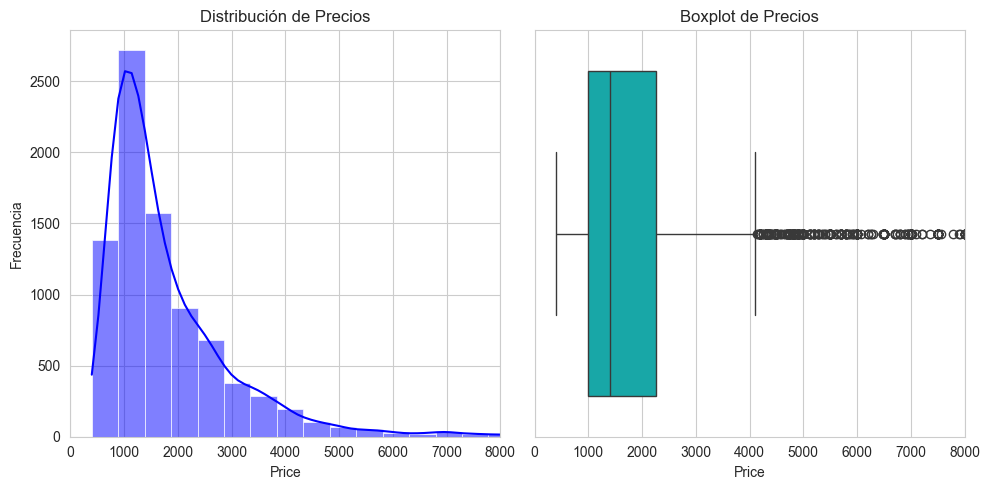

In [1730]:
#Empezamos el analisis univariante con un histplot y un boxplot de precio aprovechando el nootebook de airbnb.
plt.figure(figsize=(10, 5))

# En la primera grafica observamos que hay una gran cantidad de pisos que inician desde un precio minimo de unos 500 hasta unos 1000, 1500 que seria el maximo de pisos que hay en esos precios y desde ahi se observa una curva descendente en relacion cantidad y precio.
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True, color='b')
plt.xlim(0, df["price"].quantile(0.99))  # Limitar a percentil 99
plt.title("Distribución de Precios")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

# En la segunda grafica vemos que la mediana del precio estaria en torno a los 1400 y observamos que a partir de 4000 euros tenemos gran cantidad de outliers.
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], showfliers=True, color='c')
plt.xlim(0, df["price"].quantile(0.99))
plt.title("Boxplot de Precios")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\1354073694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, order=df['type'].value_counts().index,palette='viridis')


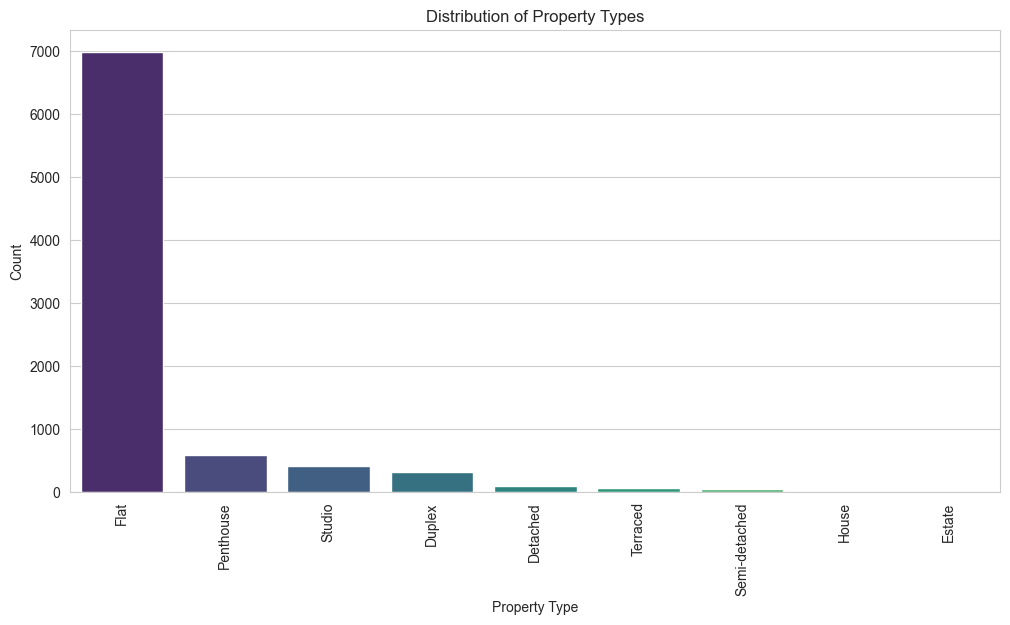

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\1354073694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='floor', data=df, order=df['floor'].value_counts().index,palette='deep')


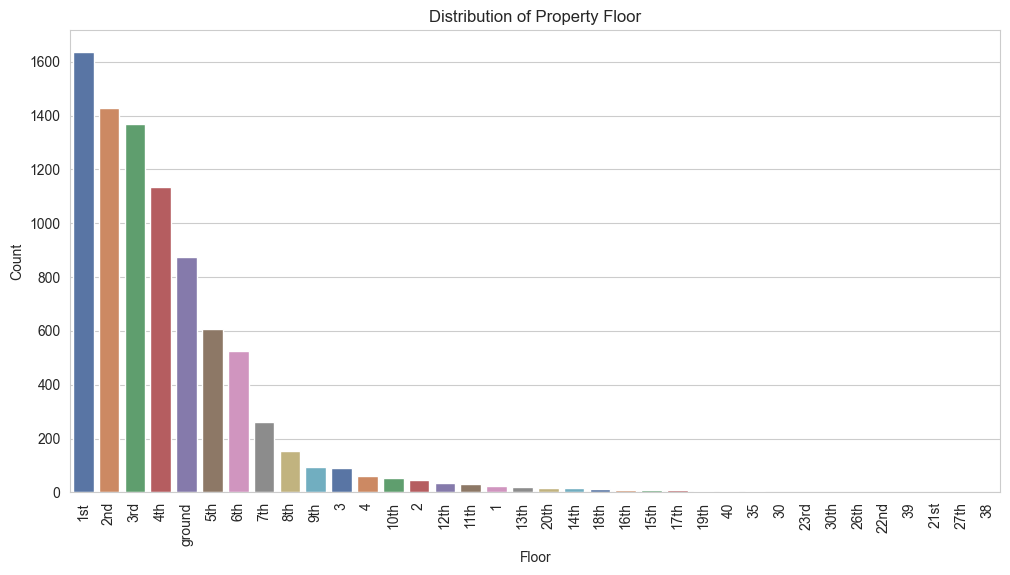

In [1731]:
#Continuamos el analisis univariante con la columna de tipos. Vemos que la mayoria de tipos son flat.
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index,palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Y por ultimo del analisis univariante miraremos la cantidad de pisos que hay dependiendo de su nº de planta. La mayoria de viviendas son un primer piso siendo raro a partir del 19º ver registros.
plt.figure(figsize=(12, 6))
sns.countplot(x='floor', data=df, order=df['floor'].value_counts().index,palette='deep')
plt.title('Distribution of Property Floor')
plt.xlabel('Floor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\3971189515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["swimming_pool"], y=df["price"], palette="Set2")


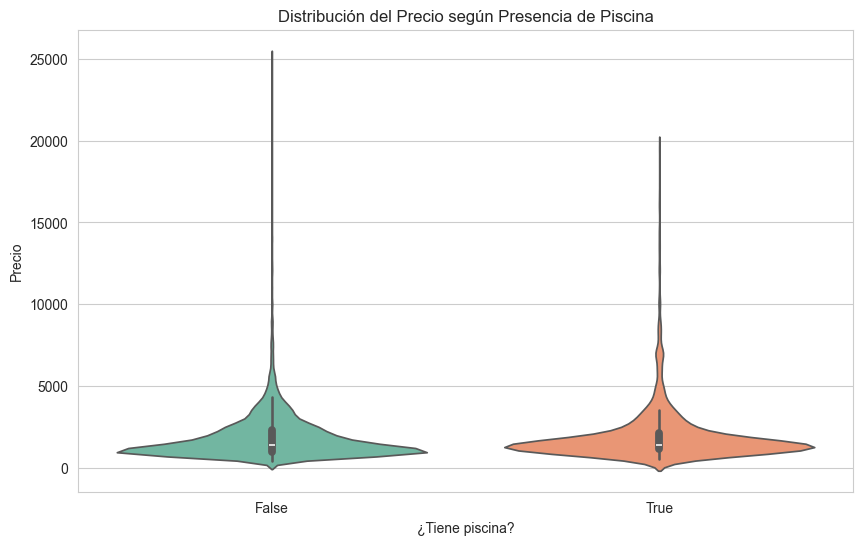

In [1732]:
#Vamnos a hacer el analisis bivariante de algunas de las columnas. Comparamos precio y piscina y vemos que no hay gran diferencia de si tiene o no.
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["swimming_pool"], y=df["price"], palette="Set2")
plt.xlabel("¿Tiene piscina?")
plt.ylabel("Precio")
plt.title("Distribución del Precio según Presencia de Piscina")
plt.show()

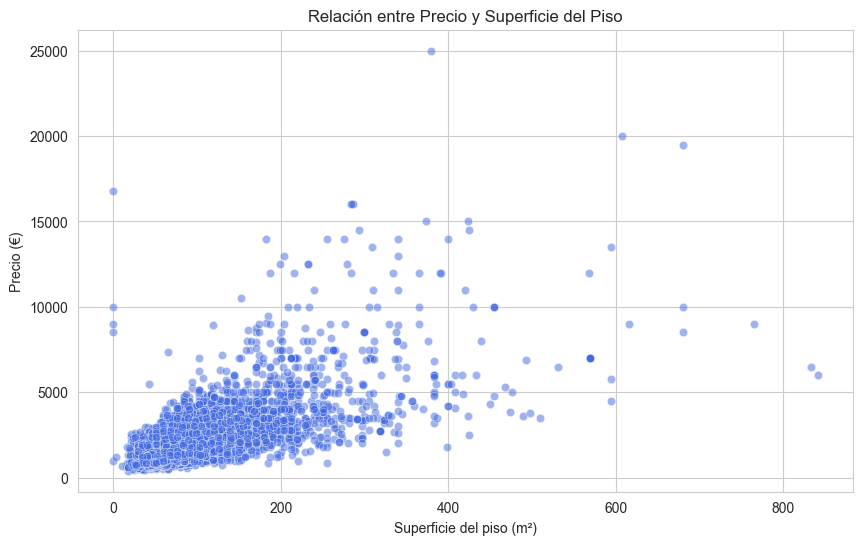

In [1733]:
# Haremos un grafico de dispersion para ver correlaciones entre price y floor. Vemos que la mayoria de viviendas estan concentradas en un valor de 0 a 5000 de precio y de 0 a 200 de superficie.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["floor_area"], y=df["price"], alpha=0.5, color="royalblue")
plt.xlabel("Superficie del piso (m²)")
plt.ylabel("Precio (€)")
plt.title("Relación entre Precio y Superficie del Piso")
plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\2600734135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="price", showfliers=False, palette="coolwarm")


Text(0, 0.5, 'Price')

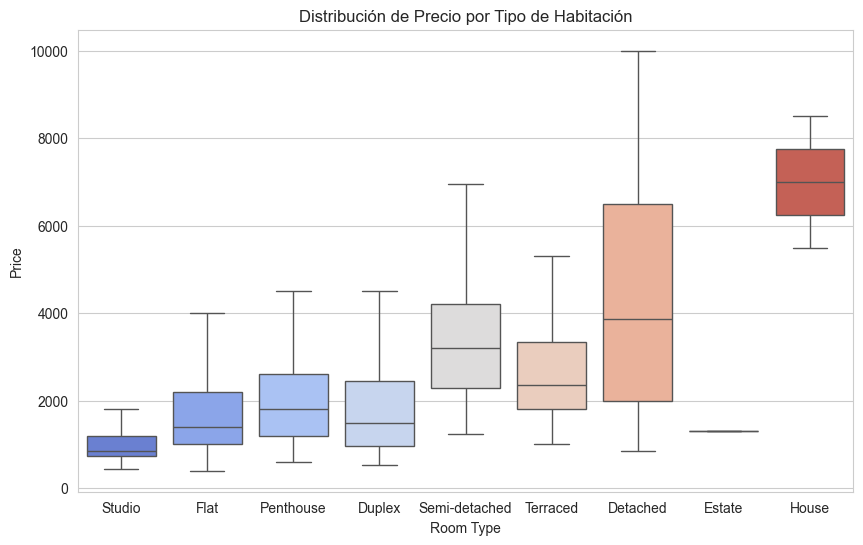

In [1734]:
#Analizamos tambien la relacion entre precio y tipo de vivienda. Vemos relacion clara entre el tipo de piso y el precio. Las casas tienen un valor altisimo respecto de los demas tipos .Studio y flat serian las opciones mas asequibles.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="type", y="price", showfliers=False, palette="coolwarm")
plt.title("Distribución de Precio por Tipo de Habitación")
plt.xlabel("Room Type")
plt.ylabel("Price")

C:\Users\alvar\AppData\Local\Temp\ipykernel_8672\3615973518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="private_owner", y="price", showfliers=False, palette="coolwarm")


Text(0, 0.5, 'Precio')

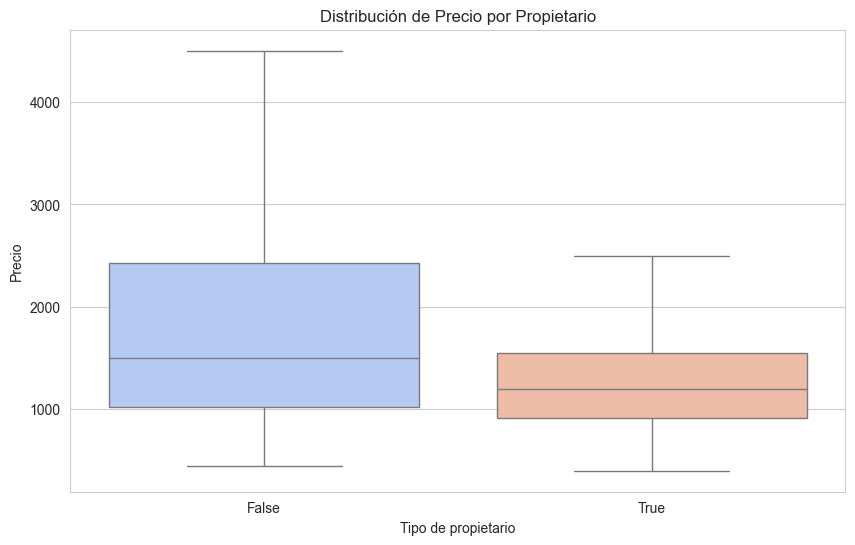

In [1735]:
#Analisis bivariante entre precio y private owner. Vemos que claramente las casas que tienen propietario privado tienen un precio mas bajo respecto de las viviendas que estan en inmobiliaria. Ademas de tener unos valores atipicos mas elevados en el caso de las inmobiliarias.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="private_owner", y="price", showfliers=False, palette="coolwarm")
plt.title("Distribución de Precio por Propietario")
plt.xlabel("Tipo de propietario")
plt.ylabel("Precio")


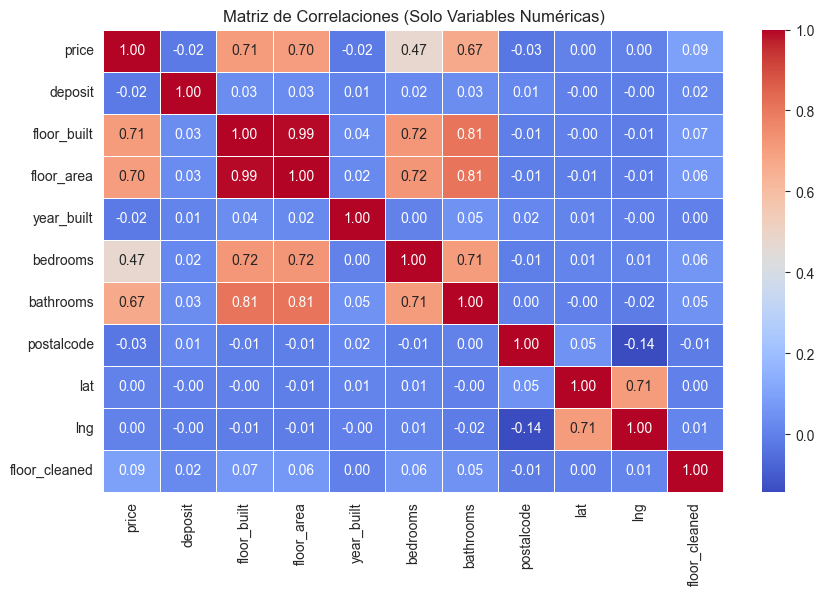

In [1736]:
#Acabamos con el analisis multivariante. Correlacion maxima de floor cleaned y price. Correlacion alta entre bathrooms y area, eso da a entender que suelen tener mas baños las casas con mas metros.
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones (Solo Variables Numéricas)")
plt.show()

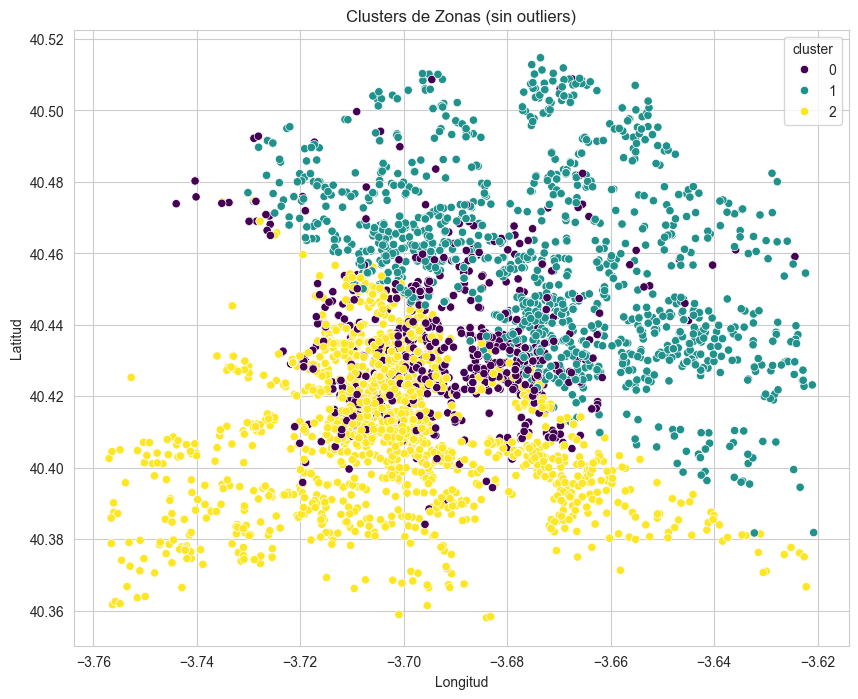

In [1737]:
#Por ultimo haremos el analisis multivariante con kmeans y sactterplot. Tenemos que eliminar algunos valores atipicos con la funcion de remove outliers para que salga una grafica interpretable. Hay una agrupacion bbastante clara de las zonas de viviendas.
# El algoritmo ha conseguido separar las zonas en tres categorias basadas en las columnas que hemos proporcionado.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes
X = df[['lat', 'lng', 'price', 'floor_area']]

# Función para eliminar outliers usando IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    return df

# Eliminar outliers
X_no_outliers = remove_outliers_iqr(X, ['lat', 'lng', 'price', 'floor_area'])

# Estandarizar los datos sin outliers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_no_outliers = X_no_outliers.copy()
df_no_outliers['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(x='lng', y='lat', hue='cluster', data=df_no_outliers, palette='viridis')
plt.title('Clusters de Zonas (sin outliers)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

## 3. Preprocesados: encoding, escalado, creación de nuevas características. 

In [ ]:
#Vamos a realizar el preprocesado de los datos con el apoyo del dataset de airbn
#Sustituimos las columnas que creemos que nos aportaran valor
columns_to_use = ["lat", "lng", "district", "subdistrict", "floor_area", "bedrooms", "bathrooms", "deposit", "year_built", "floor_cleaned", "garage_included", "furnished", "terrace", "balcony", "swimming_pool"]
df = df[columns_to_use + ["price"]]  # Dejamos la y solo para precio

# Filtrado de valores extremos en el precio
df = df[df['price'] < df['price'].quantile(0.99)]

# Agrupacion de district con kmeans. 8 clusters para la realizacion adecuada.
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['district_cluster'] = kmeans.fit_predict(df[['lat', 'lng']])

# Eliminamos las columnas una vez hecho la agrupacion con kmeans
df.drop(columns=['lat', 'lng'], inplace=True)

# Creamos tres caracteristicas derivadas 
df['price_per_m2'] = df['price'] / (df['floor_area'] + 1)
df['deposit_ratio'] = df['deposit'] / (df['price'] + 1)
df['room_density'] = df['bedrooms'] / (df['floor_area'] + 1)

# Aplicar transformación logarítmica para compararla posteriormente
df['log_price'] = np.log1p(df['price'])


df['district'] = df['district'].astype('category')
df['subdistrict'] = df['subdistrict'].astype('category')

# Aplicar Label Encoding a district y subdistrict
label_encoders = {}
for col in ['district', 'subdistrict']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos el encoder en caso de que se necesite más tarde

# Obtencion de columnas numericas y categoricas.
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features = [col for col in num_features if col not in ['price', 'log_price']]
cat_features = df.select_dtypes(include=['object','category']).columns.tolist()

# Definir X e y
X = df.drop(columns=['price', 'log_price'])
y = df['log_price']

# Division de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Utilizamos un simpleImputer para los posibles nulos
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

if cat_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# OneHotEncoder para la codificacion de columnas
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_features])
X_test_encoded = encoder.transform(X_test[cat_features])

# Creación de DataFrames codificados
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_features), index=X_test.index)

# Combinacion de las columnas numericas y las categoricas procesadas
X_train_final = pd.concat([X_train[num_features].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_features].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Función para realizar el escalado de los datos
def scale_data(scaler_name, scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}

# Función para calcular métricas
def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
        'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    }
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Modelo': model_name,
            'Preprocesado': preprocessor_name,
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAPE': mean_absolute_percentage_error(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluar sin preprocesamiento
df_results = calculate_metrics('Sin preprocesado', X_train_final, X_test_final, y_train, y_test)

# Bucle para evaluar con distintos escalados
for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = scale_data(scaler_name, scaler, X_train_final, X_test_final)
    df_results = pd.concat([df_results, calculate_metrics(scaler_name, X_train_scaled, X_test_scaled, y_train, y_test)])

# Utilizamos el algoritmo de deteccion de outliers para eliminarlos
outlier_detector = IsolationForest(contamination=0.03, random_state=42)
outlier_detector.fit(X_train_final)

mask_train = outlier_detector.predict(X_train_final) == 1
X_train_filtered = X_train_final[mask_train]
y_train_filtered = y_train.iloc[mask_train]

mask_test = outlier_detector.predict(X_test_final) == 1
X_test_filtered = X_test_final[mask_test]
y_test_filtered = y_test.iloc[mask_test]

# Evaluar después de eliminar outliers
df_results = pd.concat([df_results, calculate_metrics('IsolationForest', X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)])

# Mostrar resultados finales
print(df_results.sort_values(by='R2', ascending=False))


             Modelo      Preprocesado        R2       MAE      RMSE      MAPE
5  GradientBoosting   IsolationForest  0.999719  0.003933  0.008922  0.000542
3      DecisionTree   IsolationForest  0.999401  0.001239  0.013025  0.000167
4      RandomForest   IsolationForest  0.999388  0.001330  0.013171  0.000177
5  GradientBoosting  PowerTransformer  0.999051  0.005255  0.016804  0.000713
5  GradientBoosting    StandardScaler  0.999043  0.005266  0.016876  0.000714
5  GradientBoosting      RobustScaler  0.999012  0.005283  0.017151  0.000717
5  GradientBoosting  Sin preprocesado  0.999012  0.005285  0.017152  0.000717
5  GradientBoosting      MinMaxScaler  0.999011  0.005285  0.017153  0.000717
4      RandomForest  PowerTransformer  0.998755  0.002548  0.019252  0.000341
4      RandomForest      MinMaxScaler  0.998704  0.002582  0.019637  0.000344
4      RandomForest      RobustScaler  0.998703  0.002585  0.019648  0.000345
4      RandomForest    StandardScaler  0.998701  0.002588  0.019

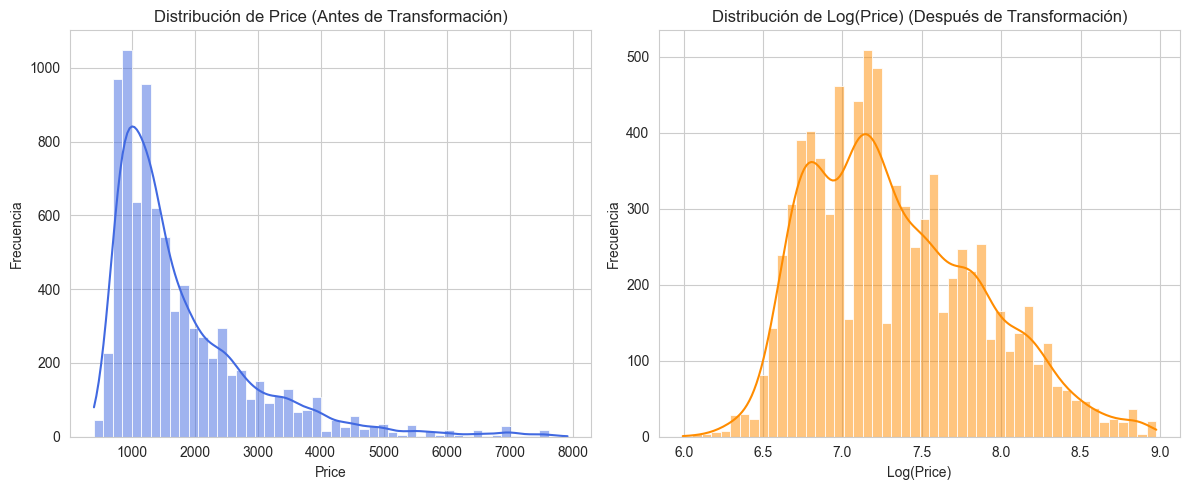

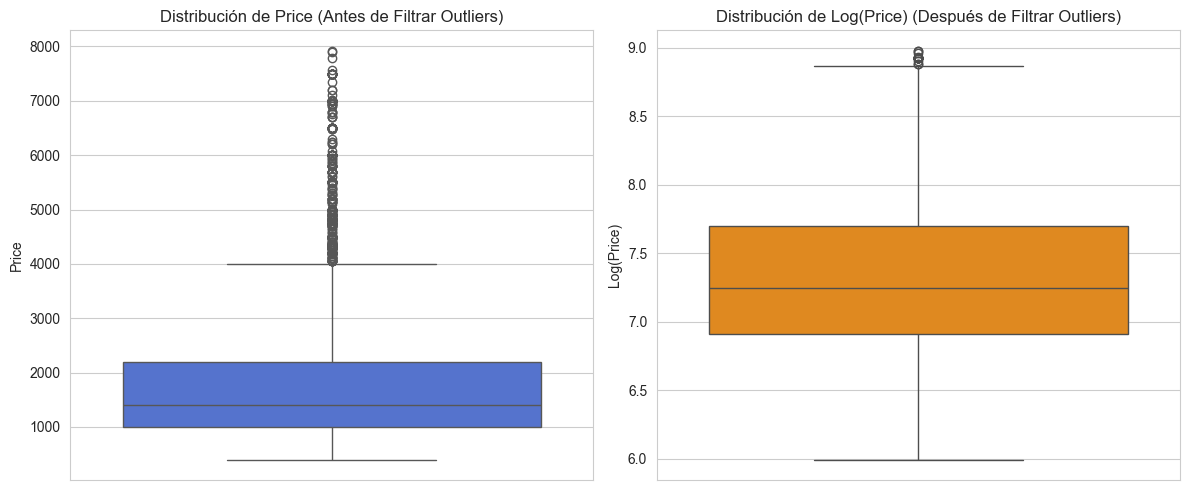

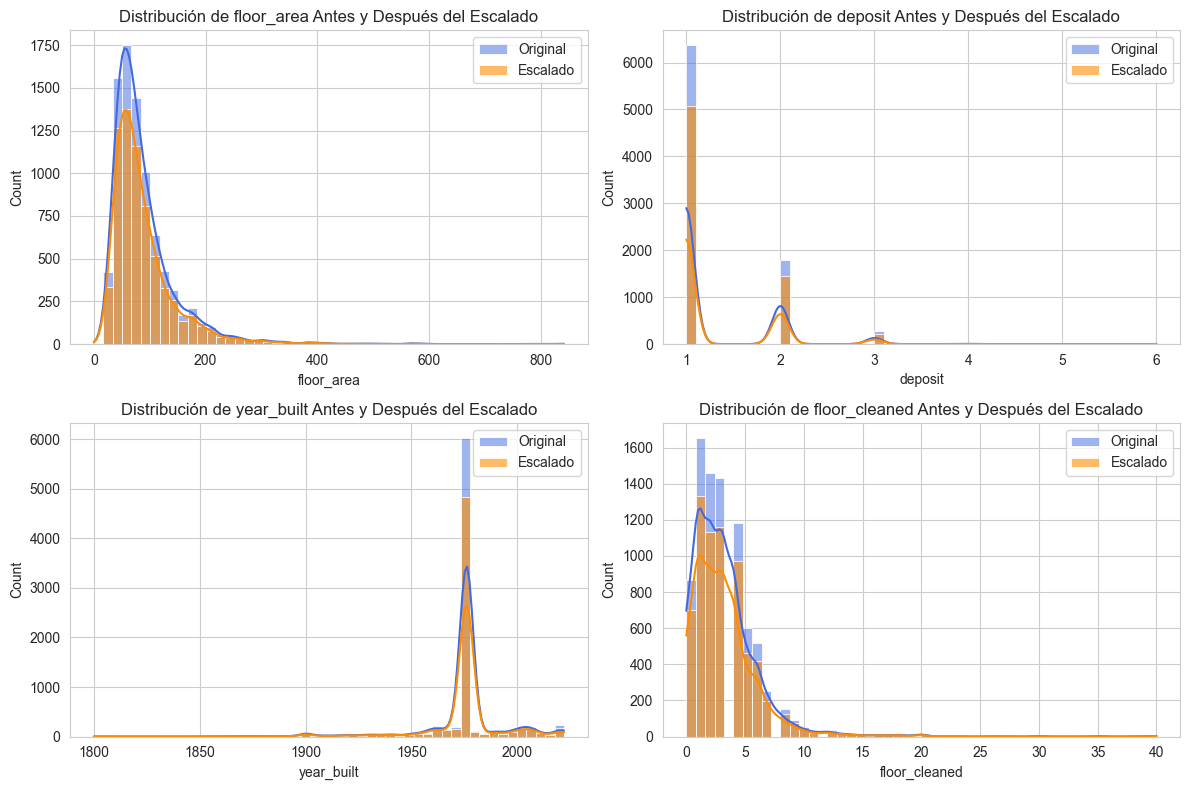

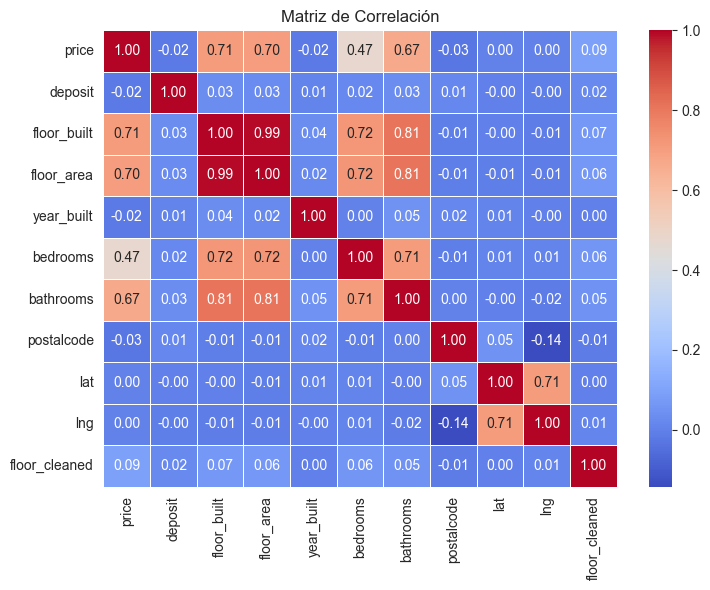

In [ ]:
# Vamos a visualizar el impacto del preprocesado en nuestros datos. Antes hicimos el EDA sin preprocesado y ahora veremos ambas graficas juntas
# Configuración de estilos
sns.set_style("whitegrid")

# Distribución de `price` antes y después de la transformación logarítmica
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color="royalblue")
plt.title("Distribución de Price (Antes de Transformación)")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], bins=50, kde=True, color="darkorange")
plt.title("Distribución de Log(Price) (Después de Transformación)")
plt.xlabel("Log(Price)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Boxplots de `price` antes y después de eliminar outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'], color="royalblue")
plt.title("Distribución de Price (Antes de Filtrar Outliers)")
plt.ylabel("Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['log_price'], color="darkorange")
plt.title("Distribución de Log(Price) (Después de Filtrar Outliers)")
plt.ylabel("Log(Price)")

plt.tight_layout()
plt.show()

# Comparación de escalado en características numéricas clave
num_features_to_plot = ["floor_area", "deposit", "year_built", "floor_cleaned"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color="royalblue", label="Original")
    sns.histplot(X_train[col], bins=50, kde=True, color="darkorange", label="Escalado", alpha=0.6)
    plt.title(f"Distribución de {col} Antes y Después del Escalado")
    plt.legend()

plt.tight_layout()
plt.show()
# Matriz de correlación
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")


plt.tight_layout()
plt.show()

Con el logaritmo para la columna de price conseguimos estabilizar la varianza y normalizar la distribucion.

Gracias al filtrado de los outliers eliminamos gran cantidad de datos atipicos que nos puedan generar problemas.

Con el escalado de las variables numericas mejoramos la convergencia del modelo.

## 4. Modelados: usar modelos de scikit learn y tensoflow para realizar una regresión sobre la columna Price, y una clasificación binaria sobre la columna balcony (si tiene terraza o no). Comparativa de resultados con los modelos. 

In [ ]:
# Vamos a utilizar esta funcion para la validacion cruzada
def evaluate_overfitting(model, X_train, y_train, X_test, y_test, name):
    
    if len(X_train) != len(y_train):
        print(f"⚠️ Advertencia: X_train ({len(X_train)}) y y_train ({len(y_train)}) tienen tamaños diferentes. Revisar preprocesamiento.")
        return None

    #  Hacemos la validacion cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculamos las metricas.
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Mostrar los resultados de los modelos a tener en cuenta.
    print(f" Modelo: {name}")
    print(f" R² en Validación Cruzada (Media): {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")
    print(f" R² en Train: {r2_train:.5f}")
    print(f" R² en Test: {r2_test:.5f}")

    # Diferencia entre Train y Test
    diff = abs(r2_train - r2_test)
    print(f" Diferencia Train-Test: {diff:.5f}\n")
    
    return r2_train, r2_test, diff

#  Aqui valoraremos los resultados de cada modelo para elegir uno para la prediccion del precio.
best_models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
}

for name, model in best_models.items():
    evaluate_overfitting(model, X_train_final, y_train, X_test_final, y_test, name)

 Modelo: RandomForest
 R² en Validación Cruzada (Media): 0.99894 ± 0.00062
 R² en Train: 0.99985
 R² en Test: 0.99870
 Diferencia Train-Test: 0.00115

 Modelo: GradientBoosting
 R² en Validación Cruzada (Media): 0.99924 ± 0.00019
 R² en Train: 0.99991
 R² en Test: 0.99901
 Diferencia Train-Test: 0.00089



El modelo RandomForest tiene una gran precision en este caso

In [ ]:
# Definir el modelo que queremos utilizar en consecuencia al que ha tenido mejor r2
best_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Entrenamos el modelo para obtener mejores resultados
best_model.fit(X_train_final, y_train)  

# Hacemos las predicciones
y_pred = best_model.predict(X_test_final)

# Como usamos logprice volvemos al original
y_pred_original = np.expm1(y_pred)

# Aqui mostrariamos algunas de las predicciones del precio
predicciones = pd.DataFrame({
    'Precio Predicho': y_pred_original
})

print("Predicciones de precios:")
print(predicciones.head(10))

Predicciones de precios:
   Precio Predicho
0      2499.987755
1      3758.316162
2       656.043436
3      1950.000000
4      1400.152380
5       750.001368
6      1481.127917
7      2024.816391
8       890.907553
9      1300.353726


La prediccion de los precios parece estar acorde al valor que suelen tener las viviendas.

RandomForest - Accuracy: 0.8338 | Precision: 0.5778 | Recall: 0.1763 | F1-Score: 0.2701 | AUC: 0.7110533728327911
GradientBoosting - Accuracy: 0.8261 | Precision: 0.5161 | Recall: 0.0542 | F1-Score: 0.0982 | AUC: 0.7046088096741294
KNN - Accuracy: 0.7995 | Precision: 0.3333 | Recall: 0.1492 | F1-Score: 0.2061 | AUC: 0.6211002379680443
SVC - Accuracy: 0.8273 | Precision: 0.6364 | Recall: 0.0237 | F1-Score: 0.0458 | AUC: 0.5945012384051285


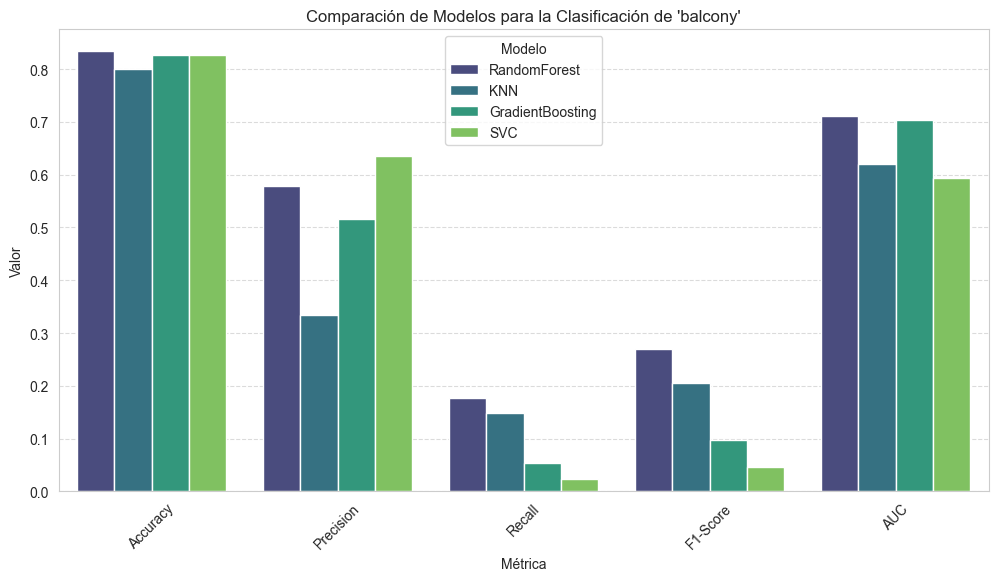

In [ ]:
# Definir X e y
X = df.drop(columns=['balcony'])  
y = df['balcony']  

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Guardamos cada tipo de columnas en una variable
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamos los datos.
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]), cat_features)
])

# Transformar datos
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Guardamos los modelos a utilizar en un diccionario
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)
}

# Evaluación de cada modelo
results = []
for name, model in models.items():
    model.fit(X_train_transformed, y_train)  

    # Predicciones
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculaccion de las metricas para hacer el analisis
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

    print(f"{name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir a DataFrame y ordenar
df_results = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Gráfico de métricas
plt.figure(figsize=(12, 6))
df_results_melted = df_results.melt(id_vars=['Modelo'], var_name='Métrica', value_name='Valor')
sns.barplot(data=df_results_melted, x='Métrica', y='Valor', hue='Modelo', palette='viridis')

plt.title("Comparación de Modelos para la Clasificación de 'balcony'")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Una vez mas el modelo con mejores resultados es Random Forest.

In [ ]:
# Configuración de validación cruzada con 5 folds estratificados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para almacenar métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# Bucle para realizar la validacion cruzada
for train_idx, test_idx in cv.split(X_train_transformed, y_train):
    X_train_fold, X_test_fold = X_train_transformed[train_idx], X_train_transformed[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    # Entrenar el mejor modelo
    best_rf = RandomForestClassifier(
        n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2, bootstrap=False, random_state=42
    )
    
    best_rf.fit(X_train_fold, y_train_fold)
    
    # Predicciones
    y_pred_fold = best_rf.predict(X_test_fold)
    y_pred_proba_fold = best_rf.predict_proba(X_test_fold)[:, 1]  # Probabilidad positiva para AUC
    
    # Guardamos cada metrica para mostrarla posteriormente
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))
    auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_fold))

# Calcular promedio y desviación estándar de las métricas
print("\n**Validación Cruzada (5-Fold) - RandomForest Optimizado**")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")



**Validación Cruzada (5-Fold) - RandomForest Optimizado**
Accuracy: 0.8249 ± 0.0035
Precision: 0.4968 ± 0.0362
Recall: 0.1621 ± 0.0122
F1-Score: 0.2436 ± 0.0107
AUC: 0.6991 ± 0.0142


La validacion cruzada en este caso mejora las 3 ultimas metricas y empeora las 2 primeras.

In [ ]:
# Realizar predicciones en el conjunto de prueba (X_test)
y_pred_test = best_rf.predict(X_test_transformed)
y_pred_proba_test = best_rf.predict_proba(X_test_transformed)

# Convertir resultados en un DataFrame para mejor visualización
df_predicciones = pd.DataFrame({
    'Real': y_test.values,
    'Predicho': y_pred_test
})

# Mostrar las primeras 10 predicciones
print("Predicciones en el conjunto de prueba:")
print(df_predicciones.head(10))

# Probabilidades para 5 predicciones
print("\nProbabilidades de cada clase para las primeras 5 predicciones:")
df_probabilidades = pd.DataFrame(y_pred_proba_test[:5], columns=best_rf.classes_)
print(df_probabilidades.head(5))

Predicciones en el conjunto de prueba:
    Real  Predicho
0  False     False
1  False     False
2  False     False
3  False     False
4  False     False
5  False     False
6  False     False
7  False     False
8  False     False
9  False     False

Probabilidades de cada clase para las primeras 5 predicciones:
      False     True 
0  0.997500  0.002500
1  0.665000  0.335000
2  0.816667  0.183333
3  0.900295  0.099705
4  0.773704  0.226296


Las predicciones en este caso son 10 de 10 en el conjunto de prueba. Esto indica un alto nivel de preccision. En las probabilidades en el primer ejemplo habria una probabilidad de que no tenga balcon. En el segundo nos mostraria el caso que menos probabilidad tiene.